<function matplotlib.pyplot.show(close=None, block=None)>

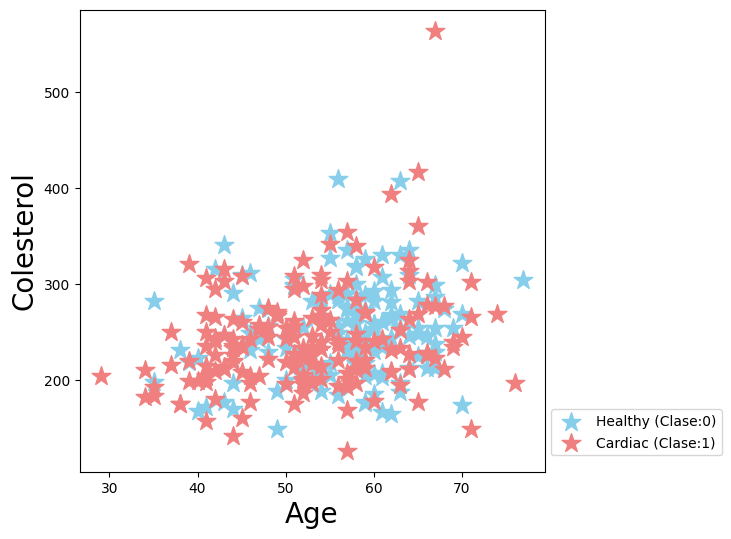

In [26]:
#white box technique, desicion tree
import pandas as pd
import matplotlib.pyplot as plt

#entropy
from scipy.stats import entropy
from math import log

#training data
from sklearn.model_selection import train_test_split

patients = pd.read_csv("pacientes.csv")
healthies = patients[patients["problema_cardiaco"]==0]
cardiacs = patients[patients["problema_cardiaco"]==1]

plt.figure(figsize=(6,6))
plt.xlabel("Age", fontsize = 20.0)
plt.ylabel("Colesterol",fontsize = 20.0)

plt.scatter(healthies["edad"] ,healthies["colesterol"],
            label="Healthy (Clase:0)", marker="*", c="skyblue", s=200)


plt.scatter(cardiacs["edad"], cardiacs["colesterol"],
             label="Cardiac (Clase:1)", marker="*", c="lightcoral", s=200)

plt.legend(bbox_to_anchor=(1, 0.15))
plt.show

In [27]:
# print(log(2,2))

# #entropy of how probably is get one face from a trhowing of a coin
# print(entropy([1/2, 1/2], base=2))
# print(entropy([10/10, 0/10], base=2))

ages = pd.Series([40,30,20,50])
colesterol = pd.Series([100,110,100,110])

print(ages.value_counts()/ages.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(ages.value_counts()/ages.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))


40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
100    0.5
110    0.5
dtype: float64
2.0
1.0


In [31]:
training_data, test_data, training_class, test_class = train_test_split(
    patients[["edad", "colesterol"]],
    patients["problema_cardiaco"],
    test_size=0.30)

0.5333333333333333
|--- Age <= 54.50
|   |--- Colesterol <= 273.50
|   |   |--- Colesterol <= 173.50
|   |   |   |--- Colesterol <= 162.00
|   |   |   |   |--- Age <= 46.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  46.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Colesterol >  162.00
|   |   |   |   |--- class: 0
|   |   |--- Colesterol >  173.50
|   |   |   |--- Colesterol <= 196.50
|   |   |   |   |--- class: 1
|   |   |   |--- Colesterol >  196.50
|   |   |   |   |--- Age <= 44.50
|   |   |   |   |   |--- Colesterol <= 198.50
|   |   |   |   |   |   |--- Colesterol <= 197.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Colesterol >  197.50
|   |   |   |   |   |   |   |--- Age <= 38.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Age >  38.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Colesterol >  198.50
|   |   |   |   |   |   |--- Age <= 39.50
|   |   |   |   |   |  

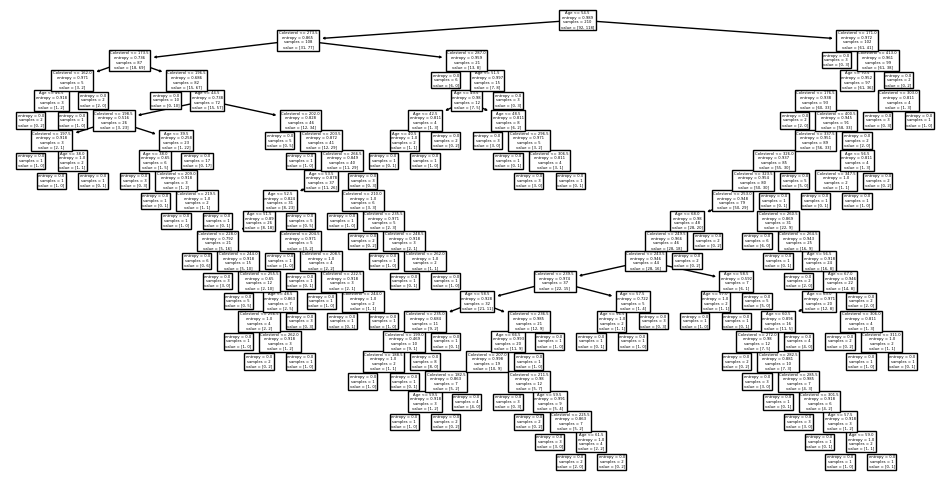

In [36]:
#creation of desision tree
from sklearn import tree
desision_tree = tree.DecisionTreeClassifier(criterion="entropy") #max_depht=2

arbol = desision_tree.fit(training_data, training_class)

#pressition of precise is it
accuracy = desision_tree.score(test_data, test_class)
print(accuracy)
print(tree.export_text(arbol, feature_names=["Age", "Colesterol"]))

plt.figure(figsize=(12,6))
tree.plot_tree(arbol,feature_names=["Age", "Colesterol"])

plt.show()

In [35]:
#by adding new patient

print("New patient", desision_tree.predict([[70, 150]]))

New patient [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
